In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import fit_bootstrap, sigmoid, calc_sup_inf

In [7]:
df = pd.read_csv("COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
df['data'] = pd.to_datetime(df['data'])
data_limite = pd.to_datetime("2020-03-13T20:00")
df=df[df['data']<data_limite]
df.index=df['data']

# Sigmoid simple

In [8]:
pstart = [2.43758048e-01, 4.31177862e+04, 1.95312145e+01]


xdata = (np.arange(len(df))+1)
ydata = df['totale_casi']
          
pfit, perr = fit_bootstrap(pstart, xdata, ydata, sigmoid)
#pfit, pcov = curve_fit(sigmoid, xdata, ydata)
#perr = np.diagonal(pcov)

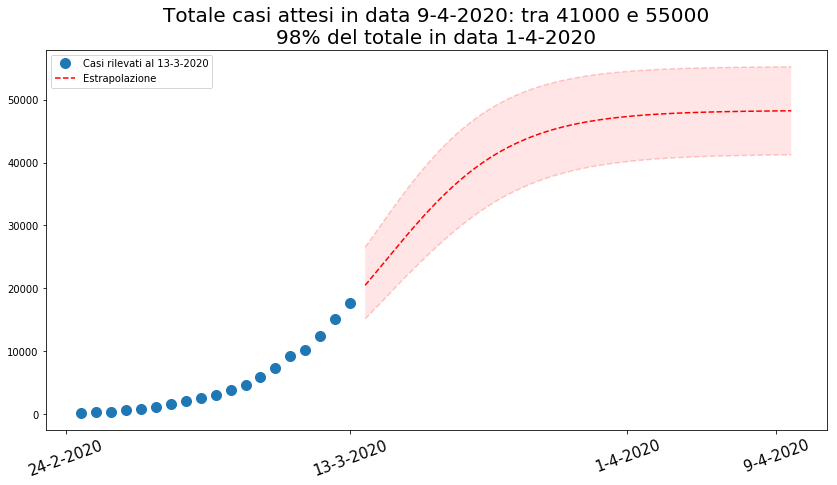

In [9]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
# i dati
data_rilev =  str(df.index[-1].day) + "-" + str(df.index[-1].month) + "-" + str(df.index[-1].year)
ax.plot(xdata, ydata, 'o', markersize=10, label = f"Casi rilevati al {data_rilev}")
# il fit sui dati
#ysim = sigmoid(xdata, pfit)
#ax.plot(xdata, ysim, '--', c = 'r')

# l'estrapolazione
xsim = np.linspace (len(xdata), 2.5*len(xdata), 1000)+1
ysim = sigmoid(xsim, pfit)
ax.plot(xsim, ysim, '--', c = 'r', label="Estrapolazione")


# l'estrapolazione superiore
ysim_sup, ysim_inf = calc_sup_inf(sigmoid, xsim, pfit, perr)

ax.plot(xsim, ysim_sup, '--', c = 'r', alpha = 0.2)
ax.plot(xsim, ysim_inf, '--', c = 'r', alpha = 0.2)
plt.fill_between(xsim, ysim_sup, ysim_inf, facecolor="red", alpha=0.1)
attesi_inf = int(np.round(ysim_inf[-1], decimals=-3))
attesi_sup = int(np.round(ysim_sup[-1], decimals=-3))

terzo_tick = df.index[-1] + 1.5*(df.index[-1]-df.index[0])
terzo_tick2print = str(terzo_tick.day) + "-" + str(terzo_tick.month) + "-" + str(terzo_tick.year) 
plt.title(f"Totale casi attesi in data {terzo_tick2print}: tra {attesi_inf} e {attesi_sup}\n" +
          "95% del totale in data", size=20)
plt.legend()

quasi_max_fac = 0.98
quasi_max_arg = np.argmax([np.allclose(pfit[1]*quasi_max_fac, yi, atol=10) for yi in ysim])
quasi_max_x = xsim[quasi_max_arg]
quasi_max_data = df.index[0] + np.timedelta64(int(quasi_max_x), 'D')
quasi_max_data_str = str(quasi_max_data.day) + "-" + str(quasi_max_data.month) + "-" + str(quasi_max_data.year)

dates2plot = [str(df.index[0].day) + "-" + str(df.index[0].month) + "-" + str(df.index[0].year),
              data_rilev,
              quasi_max_data_str,
              terzo_tick2print
             ]

plt.xticks(ticks=[0, len(df), quasi_max_x, 2.5*len(df)], labels=dates2plot,rotation=20, size = 15)
plt.title(f"Totale casi attesi in data {terzo_tick2print}: tra {attesi_inf} e {attesi_sup}\n" +
          f"{quasi_max_fac*100 :2.0f}% del totale in data " +quasi_max_data_str, size=20)
plt.legend()
plt.show()